Importing Libraries

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.models import Sequential, load_model
from keras.callbacks import EarlyStopping
from keras.datasets import cifar10

Loading Data

In [2]:
# Loading  data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


In [4]:
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

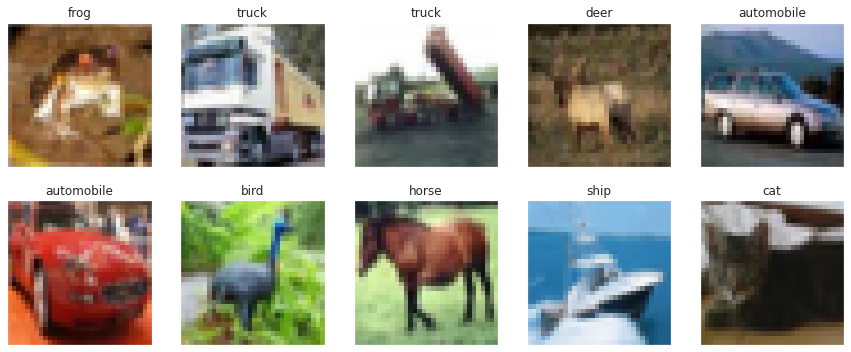

In [5]:
#Display the first few images of the training set
fig, ax = plt.subplots(2, 5, figsize=(15, 6))
index = 0
for i in range(2):
    for j in range(5):
        ax[i, j].imshow(x_train[index])
        ax[i, j].set_title(labels[y_train[index][0]])
        ax[i,j].get_xaxis().set_visible(False)
        ax[i,j].get_yaxis().set_visible(False)
        index += 1
plt.show()

In [6]:
# converting both x_train and x_test to grayscale
x_train = np.array([cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) for img in x_train])
x_test = np.array([cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) for img in x_test])

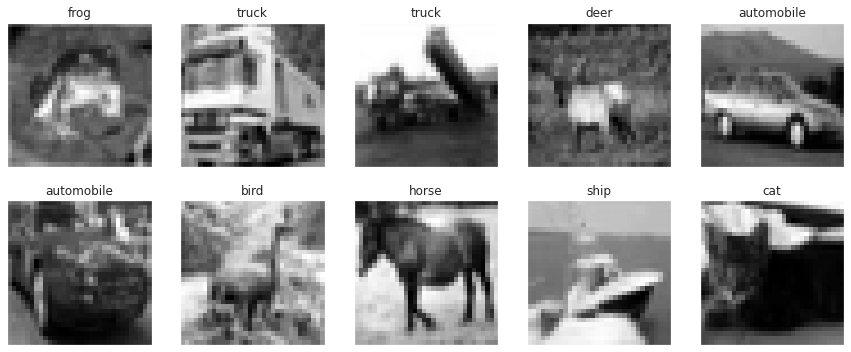

In [7]:
# Display the first few images of the training set(grayscale)
fig, ax = plt.subplots(2, 5, figsize=(15, 6))
index = 0
for i in range(2):
    for j in range(5):
        ax[i, j].imshow(x_train[index], cmap='gray')
        ax[i, j].set_title(labels[y_train[index][0]])
        ax[i,j].get_xaxis().set_visible(False)
        ax[i,j].get_yaxis().set_visible(False)
        index += 1
plt.show()

In [8]:
#value normalization
x_train = x_train / 255
x_test = x_test / 255

Label Preprocessing

In [9]:
# label preprocessing
one_hot_encoder = OneHotEncoder(sparse=False)

one_hot_encoder.fit(y_train)

OneHotEncoder(sparse=False)

In [10]:
y_train = one_hot_encoder.transform(y_train)
y_test = one_hot_encoder.transform(y_test)

In [11]:
#Defining input shape for CNN model
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)

input_shape = (x_train.shape[1], x_train.shape[2], 1)

Constructing CNN Model

In [12]:
#Constructing CNN model
model = Sequential()
model.add(Conv2D(16, kernel_size=(3, 3), activation='relu', strides=(1,1),padding='same', input_shape=input_shape))
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', strides=(1,1),padding='same'))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', strides=(1,1),padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(16, kernel_size=(3, 3), activation='relu', strides=(1,1),padding='same'))
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', strides=(1,1),padding='same'))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', strides=(1,1),padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))

Compiling Model

In [13]:
#Compiling the model

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

In [ ]:
#model training

history = model.fit(x_train, y_train, epochs=50, batch_size=128,validation_data=(x_test,y_test), validation_split=0.2)

Epoch 1/50
391/391 [==============================] - 332s 847ms/step - loss: 1.8418 - accuracy: 0.3192 - val_loss: 1.4926 - val_accuracy: 0.4468
Epoch 2/50
391/391 [==============================] - 330s 845ms/step - loss: 1.4011 - accuracy: 0.4985 - val_loss: 1.1859 - val_accuracy: 0.5749
Epoch 3/50
391/391 [==============================] - 331s 847ms/step - loss: 1.1631 - accuracy: 0.5875 - val_loss: 1.0492 - val_accuracy: 0.6331
Epoch 4/50
391/391 [==============================] - 329s 840ms/step - loss: 1.0223 - accuracy: 0.6412 - val_loss: 0.9872 - val_accuracy: 0.6603
Epoch 5/50
391/391 [==============================] - 330s 843ms/step - loss: 0.9145 - accuracy: 0.6821 - val_loss: 0.8802 - val_accuracy: 0.6964
Epoch 6/50
391/391 [==============================] - 329s 840ms/step - loss: 0.8204 - accuracy: 0.7158 - val_loss: 0.8510 - val_accuracy: 0.7028
Epoch 7/50
391/391 [==============================] - 329s 842ms/step - loss: 0.7440 - accuracy: 0.7421 - val_loss: 0.8438 -

In [ ]:
#Saving/ loading the model

model.save('cifar10_model.h5')
model = load_model('cifar10_model.h5')

Model Evaluation

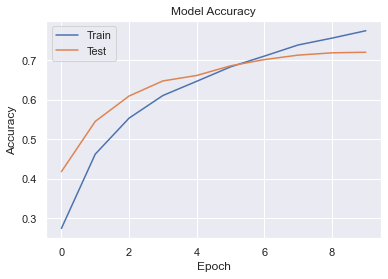

In [ ]:
# Model Evaluation

# Plotting the training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()



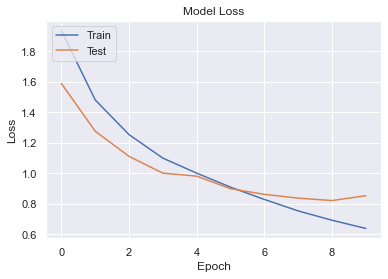

In [ ]:
# Plotting the training and validation loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
# Prediction on test data

y_pred = model.predict(x_test)
y_pred = one_hot_encoder.inverse_transform(y_pred)

y_test = one_hot_encoder.inverse_transform(y_test)

Confusion Matrix

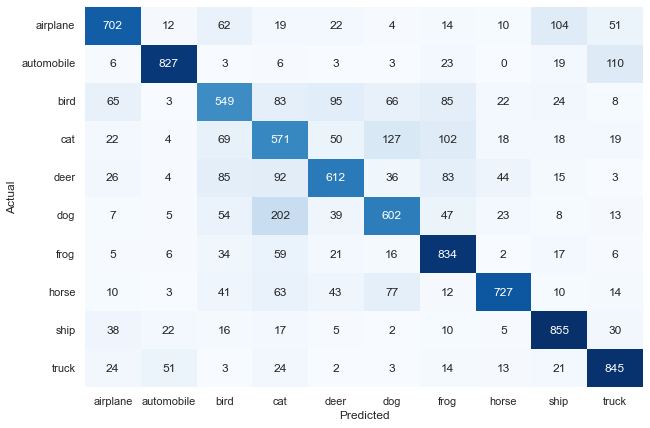

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, cbar=False, xticklabels=labels, yticklabels=labels, fmt='d', annot=True, cmap=plt.cm.Blues)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Classification Report

In [ ]:
# Displaying the classification report
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, target_names=labels))


              precision    recall  f1-score   support

    airplane       0.78      0.70      0.74      1000
  automobile       0.88      0.83      0.85      1000
        bird       0.60      0.55      0.57      1000
         cat       0.50      0.57      0.53      1000
        deer       0.69      0.61      0.65      1000
         dog       0.64      0.60      0.62      1000
        frog       0.68      0.83      0.75      1000
       horse       0.84      0.73      0.78      1000
        ship       0.78      0.85      0.82      1000
       truck       0.77      0.84      0.81      1000

    accuracy                           0.71     10000
   macro avg       0.72      0.71      0.71     10000
weighted avg       0.72      0.71      0.71     10000



Displaying the test data images with actual and predicted labels

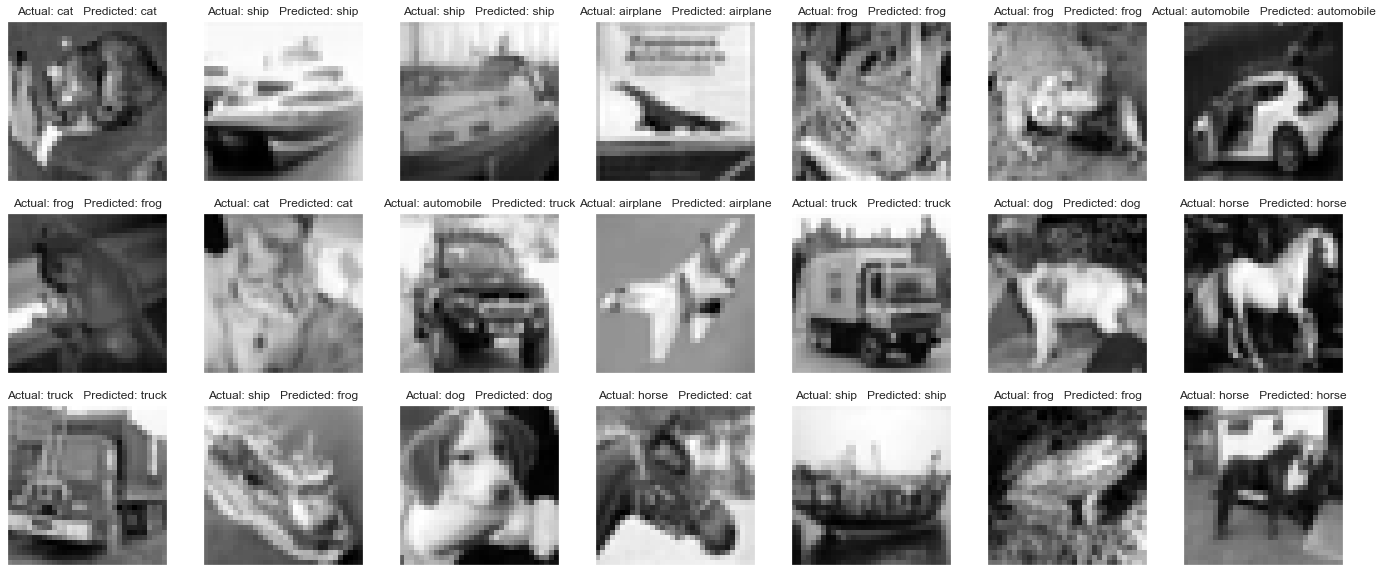

In [ ]:
#Displaying the test data images with their predicted and actual labels
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2])

y_test = y_test.astype(int)
y_pred = y_pred.astype(int)

fig, axes = plt.subplots(ncols=7, nrows=3, sharex=False,
    sharey=True, figsize=(24, 10))
index = 0
for i in range(3):
    for j in range(7):
        axes[i, j].imshow(x_test[index], cmap='gray')
        axes[i, j].set_title('Actual: ' + labels[y_test[index][0]] +

        '   Predicted: ' + labels[y_pred[index][0]])
        axes[i,j].get_xaxis().set_visible(False)
        axes[i,j].get_yaxis().set_visible(False)
        index += 1
plt.show()
